In [ ]:
%pip install cnstd

In [ ]:
%pip install cnocr

In [1]:
from cnstd import CnStd
from cnocr import CnOcr
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.patches as patches

std = CnStd()
cn_ocr = CnOcr(model_name='densenet-lite-gru')

[WARNING 2020-08-24 12:38:10,903 _showwarnmsg:110] C:\Users\hp\Anaconda3\lib\site-packages\mxnet\gluon\block.py:1389: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]
 


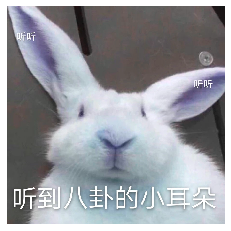

In [2]:
test_img = cv.imread("./single-line1.jpg", 1)
plt.axis('off')
plt.imshow(test_img)

In [3]:
box_info_list = std.detect('./single-line1.jpg')

for box_info in box_info_list:
    cropped_img = box_info['cropped_img']  # 检测出的文本框
    ocr_res = cn_ocr.ocr_for_single_line(cropped_img)
    print('ocr result: %s' % ''.join(ocr_res))

ocr result: 听听
ocr result: 听听
ocr result: 听到八卦的小耳朵


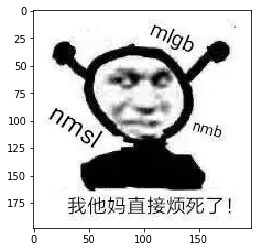

In [4]:
test_img = cv.imread("./tilt.jpg", 1)
plt.imshow(test_img)

ocr result: mlgb
ocr result: nmsl
ocr result: tittib
ocr result: 我他妈直接烦死了!


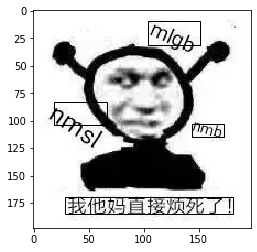

In [5]:
box_info_list = std.detect('./tilt.jpg', model_name='resnet50_v1b')

fig,ax = plt.subplots(1)
ax.imshow(test_img)

for box_info in box_info_list:
    cropped_img = box_info['cropped_img']  # 检测出的文本框
    ocr_res = cn_ocr.ocr_for_single_line(cropped_img)
    print('ocr result: %s' % ''.join(ocr_res))
    
    ax.add_patch(
     patches.Rectangle(
        box_info['box'][0],
        box_info['box'][1][0] - box_info['box'][0][0],
        box_info['box'][3][1] - box_info['box'][0][1],
        fill=False      # remove background
     ))
    
plt.show()

{'box': array([[ 18,  83],
       [ 67, 108],
       [ 56, 129],
       [  7, 104]]), 'score': 1.0, 'cropped_img': array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [159, 159, 159],
        [ 98,  98,  98],
        [ 80,  80,  80]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [227, 227, 227],
        [223, 223, 223],
        [237, 237, 237]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [248, 248, 248],
        [239, 239, 239],
        [246, 246, 246]],

       ...,

       [[252, 252, 252],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [251, 251, 251],
        [251, 251, 251]],

       [[252, 252, 252],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [244, 244, 244],
        [252, 252, 252],
        [254, 254, 254]],

       [[254, 254, 254],
        [253, 253, 253

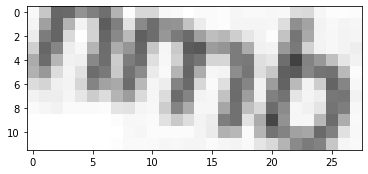

In [6]:
print(box_info_list[1])
plt.imshow(box_info_list[2]['cropped_img'])

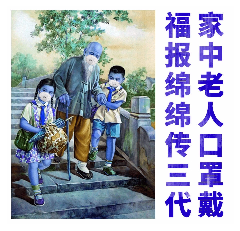

In [24]:
test_img = cv.imread("./vertical1.jpg", 1)
plt.axis('off')
plt.imshow(test_img)

In [36]:
box_info_list = std.detect('./vertical1.jpg')
box_info_list = box_info_list[:1]

for box_info in box_info_list:
    cropped_img = box_info['cropped_img']  # 检测出的文本框
    width = box_info['box'][1][0] - box_info['box'][0][0]
    height = box_info['box'][2][1] - box_info['box'][0][1]
    vert = height > width
    
    cheight, cwidth, channels = cropped_img.shape
    if (cheight > cwidth) is not vert:
        print('checked')
        cropped_img = cv.rotate(cropped_img, cv.ROTATE_90_CLOCKWISE)
    
    print('box info', box_info)
    ocr_res = cn_ocr.ocr(cropped_img)
    print('ocr result: ', ocr_res)

checked
box info {'box': array([[ 777,   29],
       [1086,   29],
       [1086, 1055],
       [ 777, 1055]]), 'score': 1.0, 'cropped_img': array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254

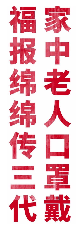

In [34]:
plt.axis('off')
plt.imshow(cropped_img)

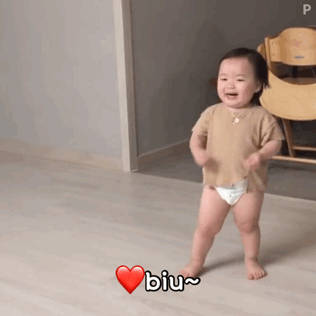

In [10]:
box_info_list = std.detect('./gif.gif')

for box_info in box_info_list:
    cropped_img = box_info['cropped_img']  # 检测出的文本框
    ocr_res = cn_ocr.ocr_for_single_line(cropped_img)
    print('ocr result: %s' % ''.join(ocr_res))

ocr result: biu~


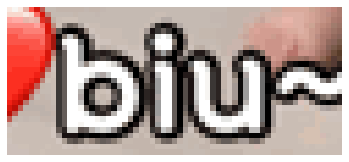

In [11]:
cropped_img = box_info_list[0]['cropped_img']
plt.axis('off')
plt.imshow(cropped_img)